In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('laptop_11.csv')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD,1
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,Flash,0
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD,1
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD,1


## Задание 1
### 1.1 Изучите количество памяти с помощью matplotlib


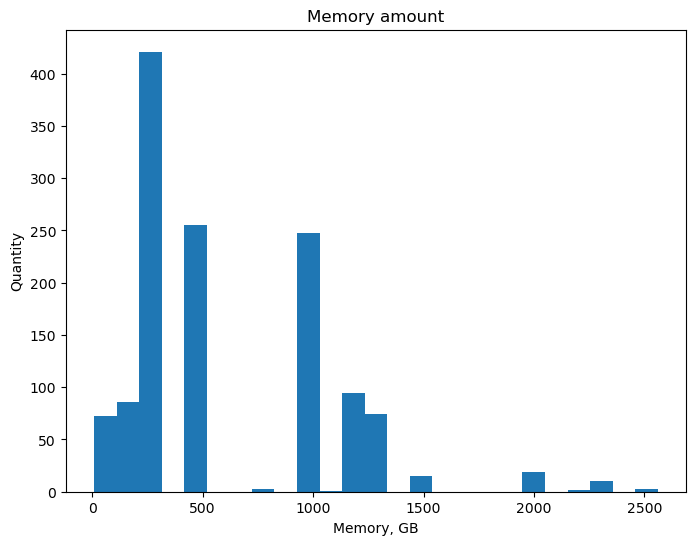

In [3]:
plt.figure(figsize=(8,6))

plt.hist(df.Memory_Amount, bins=25)
plt.xlabel('Memory, GB')
plt.ylabel('Quantity')
plt.title('Memory amount');

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib


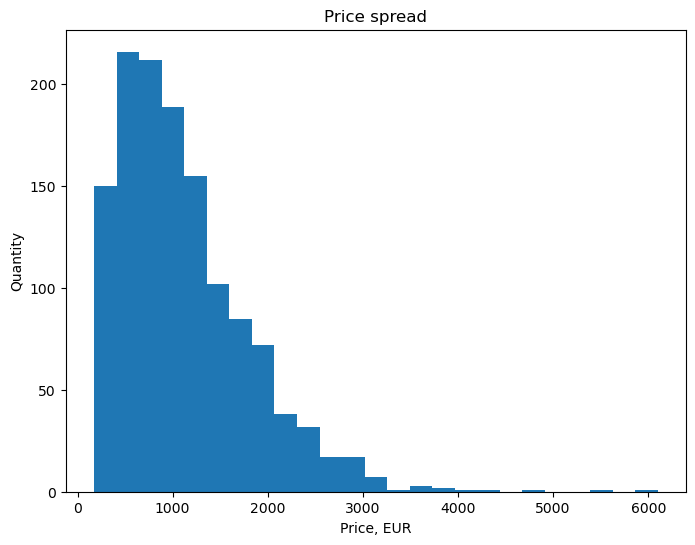

In [4]:
plt.figure(figsize=(8,6))

plt.hist(df.Price_euros, bins=25)
plt.xlabel('Price, EUR')
plt.ylabel('Quantity')
plt.title('Price spread');

### 1.3 Изучите вес ноутбуков с помощью matplotlib
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы


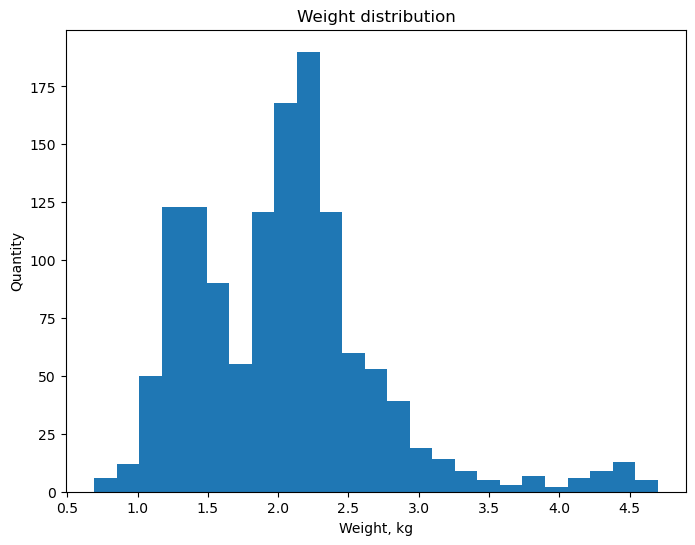

In [5]:
plt.figure(figsize=(8,6))

plt.hist(df.Weight, bins=25)
plt.xlabel('Weight, kg')
plt.ylabel('Quantity')
plt.title('Weight distribution');

## Задание 2
### 2.1 Изучите распределение типов носителя

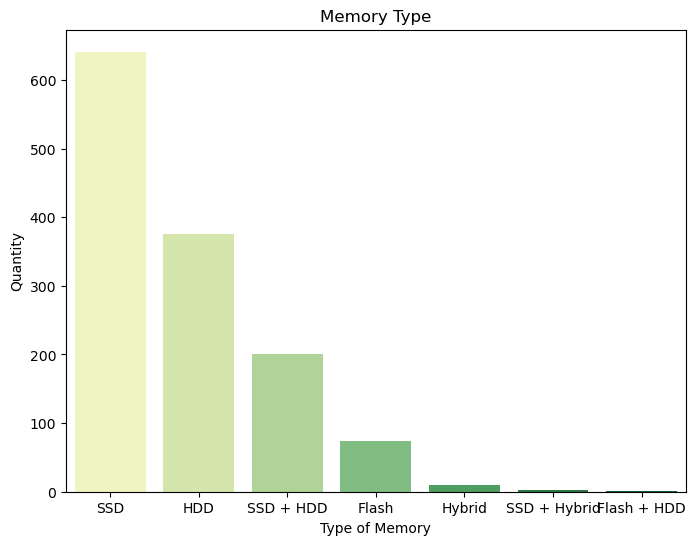

In [6]:
mem_c = df.value_counts(df.Memory_Type)

plt.figure(figsize=(8, 6))

plt.title('Memory Type')
sns.barplot(x=mem_c.index, y=mem_c.values, palette='YlGn'),
plt.xlabel('Type of Memory')
plt.ylabel('Quantity');

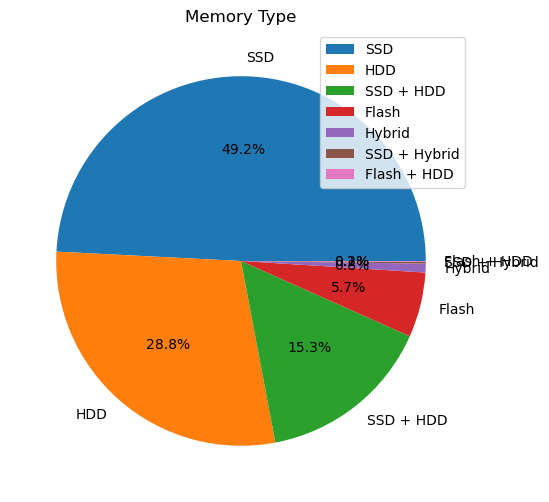

In [7]:
mem_c = df.value_counts(df.Memory_Type)

plt.figure(figsize=(8, 6))

plt.title('Memory Type')
plt.pie(mem_c.values, autopct='%1.1f%%', labels=mem_c.index)
plt.legend(mem_c.index);

### 2.2 Изучите распределение компаний производителей


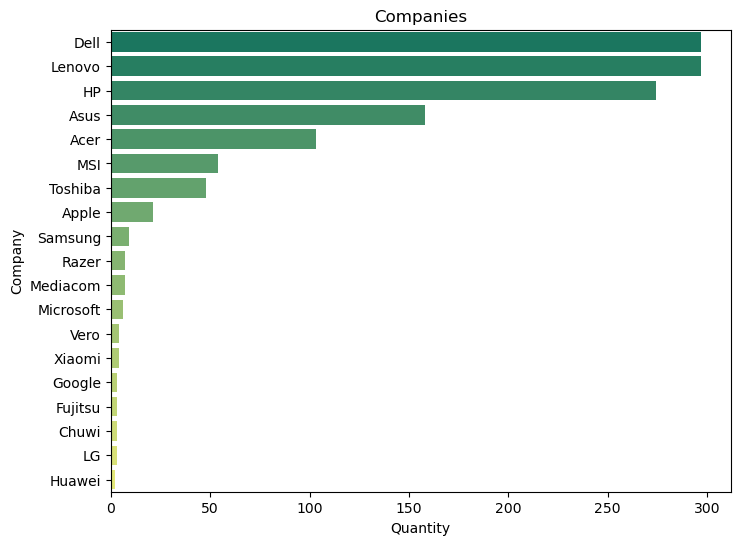

In [8]:
com_c = df.value_counts(df.Company)
plt.figure(figsize=(8, 6))

plt.title('Companies')
sns.barplot(y=com_c.index, x=com_c.values, palette='summer', orient="h")
plt.xlabel('Quantity');

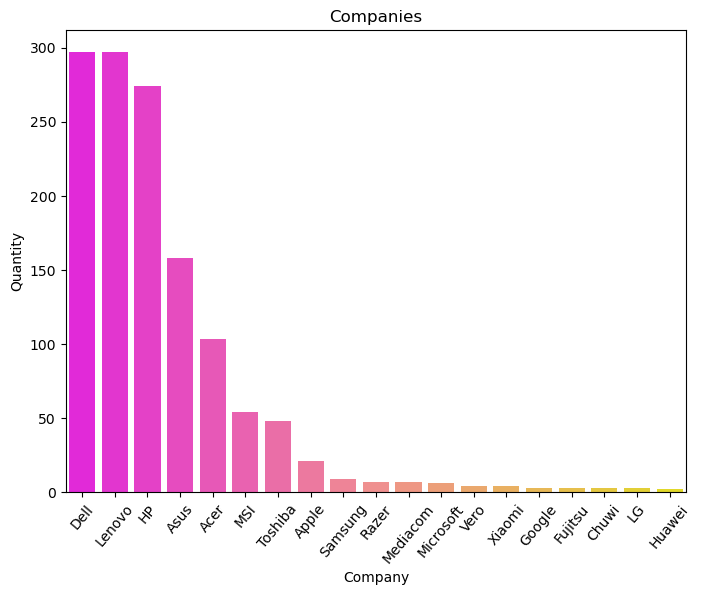

In [9]:
plt.figure(figsize=(8, 6))

plt.title('Companies')
sns.barplot(x=com_c.index, y=com_c.values, palette='spring')
plt.xticks(rotation=50)
plt.ylabel('Quantity');


### 2.3 Изучите распределение операционной системы

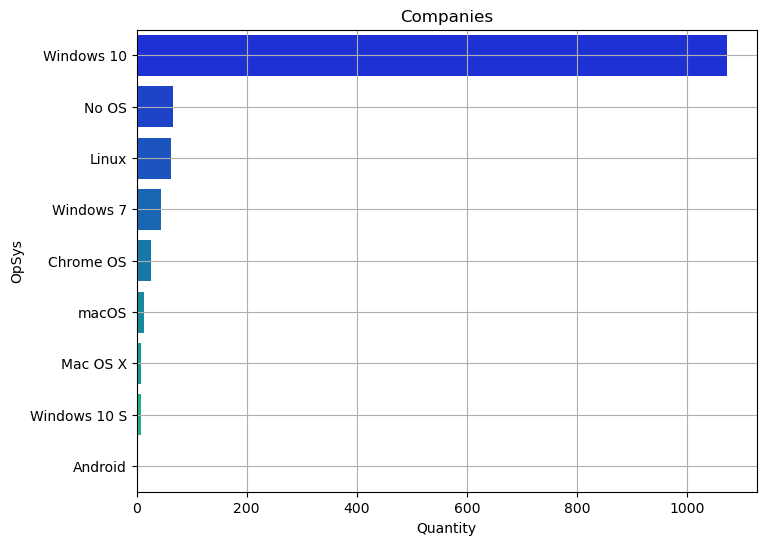

In [10]:
op_c = df.value_counts(df.OpSys)

plt.figure(figsize=(8, 6))

plt.title('Companies')
sns.barplot(y=op_c.index, x=op_c.values, palette='winter', orient="h")
plt.xlabel('Quantity')
plt.grid();

### 2.4 Изучите распределение компаний производителей CPU

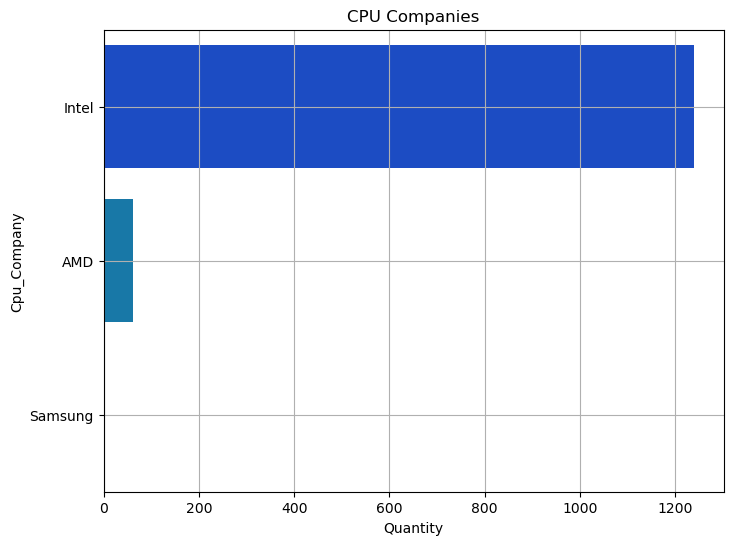

In [11]:
cpu_c = df.value_counts(df.Cpu_Company)
plt.figure(figsize=(8, 6))

plt.title('CPU Companies')
sns.barplot(y=cpu_c.index, x=cpu_c.values, palette='winter', orient="h")
plt.xlabel('Quantity')
plt.grid();

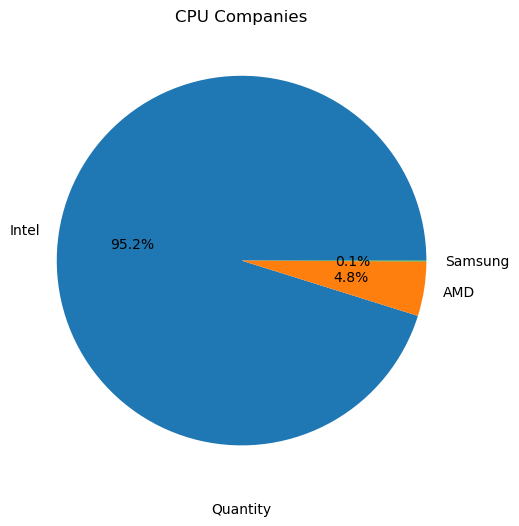

In [12]:
plt.figure(figsize=(8, 6))

plt.title('CPU Companies')
plt.pie(cpu_c.values, labels=cpu_c.index, autopct="%1.1f%%")
plt.xlabel('Quantity')
plt.grid();

## Задание 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму

### 3.1 Постройте график в абсолютных величинах


In [13]:
data1 = pd.crosstab(index=df.Company, columns=df.Cpu_Company)
data1.drop(columns='Samsung', inplace=True)
data1.head()

Cpu_Company,AMD,Intel
Company,,
Acer,10,93
Apple,0,21
Asus,11,147
Chuwi,0,3
Dell,0,297


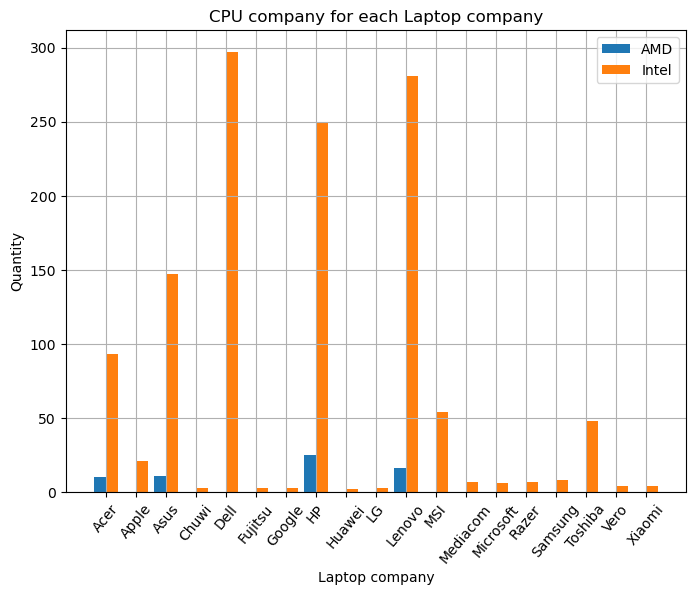

In [21]:
plt.figure(figsize=(8, 6))

n_ticks = np.arange(len(data1.index))

w = 0.4

plt.bar(n_ticks - w/2, data1.AMD, width=w)
plt.bar(n_ticks + w/2, data1.Intel, width=w)
plt.xticks(n_ticks, data1.index, rotation=50)
plt.legend(data1.columns)
plt.title('CPU company for each Laptop company')
plt.xlabel('Laptop company')
plt.ylabel('Quantity')
plt.grid();

### 3.2 Постройте график в относительных величинах


In [34]:
data1n = pd.crosstab(index=df.Company[df.Cpu_Company != 'Samsung'], columns=df.Cpu_Company[df.Cpu_Company != 'Samsung'], 
                     normalize='index')
data1n.head().style.format(precision=2)

Cpu_Company,AMD,Intel
Company,,
Acer,0.10,0.90
Apple,0.00,1.00
Asus,0.07,0.93
Chuwi,0.00,1.00
Dell,0.00,1.00


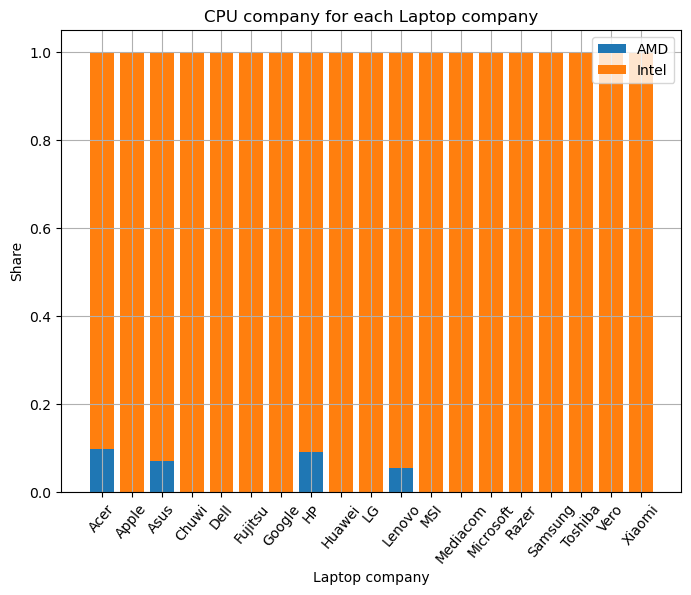

In [35]:
plt.figure(figsize=(8, 6))

n_ticks = np.arange(len(data1n.index))

plt.bar(n_ticks, data1n.AMD)
plt.bar(n_ticks, data1n.Intel, bottom=data1n.AMD)
plt.xticks(n_ticks, data1n.index, rotation=50)
plt.legend(data1n.columns)
plt.title('CPU company for each Laptop company')
plt.xlabel('Laptop company')
plt.ylabel('Share')
plt.grid();

## Задание 4
### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора


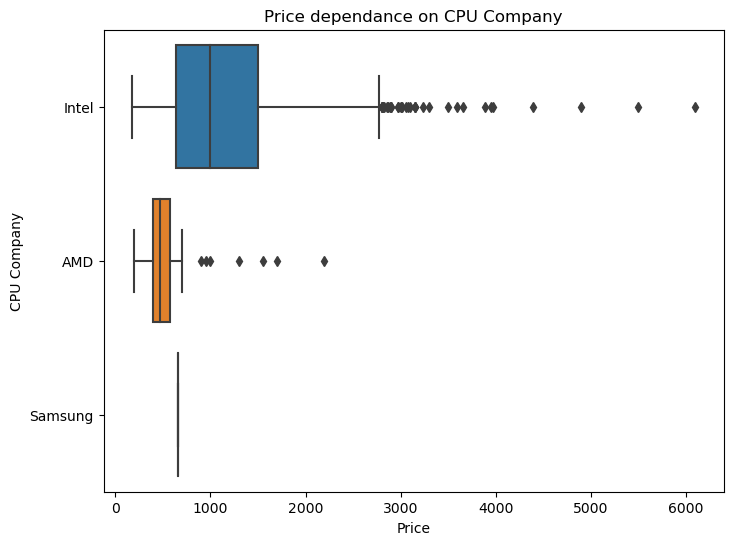

In [72]:
plt.figure(figsize=(8,6))

sns.boxplot(x=df.Price_euros, y=df.Cpu_Company, whis=1.5)

plt.title('Price dependance on CPU Company')
plt.xlabel('Price')
plt.ylabel('CPU Company')
plt.show;

### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти


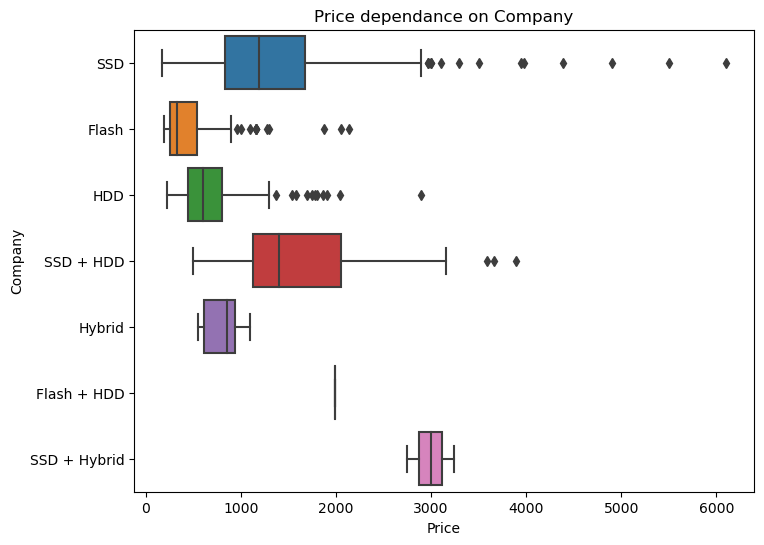

In [38]:
plt.figure(figsize=(8,6))

sns.boxplot(x=df.Price_euros, y=df.Memory_Type, whis=1.5)

plt.title('Price dependance on Company')
plt.xlabel('Price')
plt.ylabel('Company')
plt.show;

### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти


In [63]:
df.Ram.value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [68]:
data2 = df.copy()
data2['Ram_n'] = data2.Ram.apply(lambda x: int(x[0:-2]))
data2.sort_values('Ram_n', inplace=True)
data2.drop(columns='Ram_n', inplace=True)

data2[395:400]

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type,SSD
1085,1100,HP,EliteBook 840,Notebook,14.0,Intel Core i5 6200U 2.3GHz,4GB,Intel HD Graphics 520,Windows 7,1.54,1030.99,Intel,500,HDD,0
1107,1122,Lenovo,Yoga 500-15ISK,2 in 1 Convertible,15.6,Intel Core i5 6200U 2.3GHz,4GB,Intel HD Graphics 520,Windows 10,2.10,867.00,Intel,256,SSD,1
557,564,Lenovo,IdeaPad 320-17IKB,Notebook,17.3,Intel Core i7 7500U 2.7GHz,6GB,Nvidia GeForce 940MX,Windows 10,2.80,949.00,Intel,1152,SSD + HDD,1
155,158,HP,15-BS103nv (i5-8250U/6GB/256GB/Radeon,Notebook,15.6,Intel Core i5 8250U 1.6GHz,6GB,AMD Radeon 520,Windows 10,1.91,619.00,Intel,256,SSD,1
105,108,HP,Pavilion 14-BK001nv,Notebook,14.0,Intel Core i5 7200U 2.5GHz,6GB,Nvidia GeForce 940MX,Windows 10,1.58,659.00,Intel,256,SSD,1


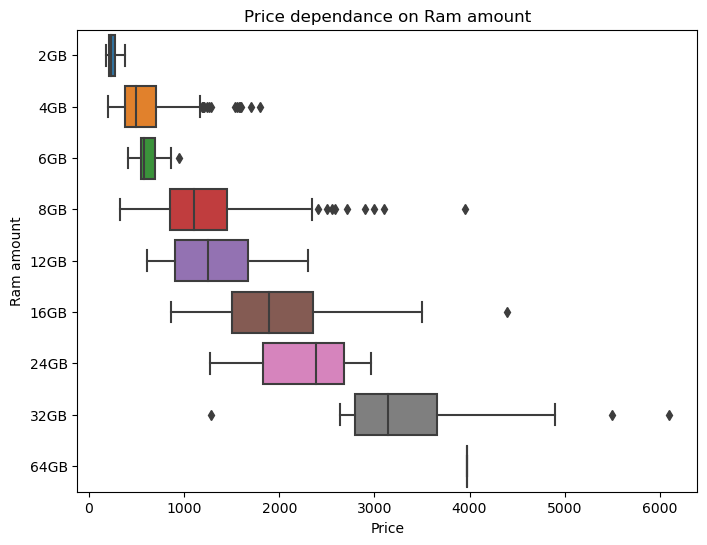

In [70]:
plt.figure(figsize=(8,6))

sns.boxplot(x=data2.Price_euros, y=data2.Ram, whis=1.5)

plt.title('Price dependance on Ram amount')
plt.xlabel('Price')
plt.ylabel('Ram amount')
plt.show;

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

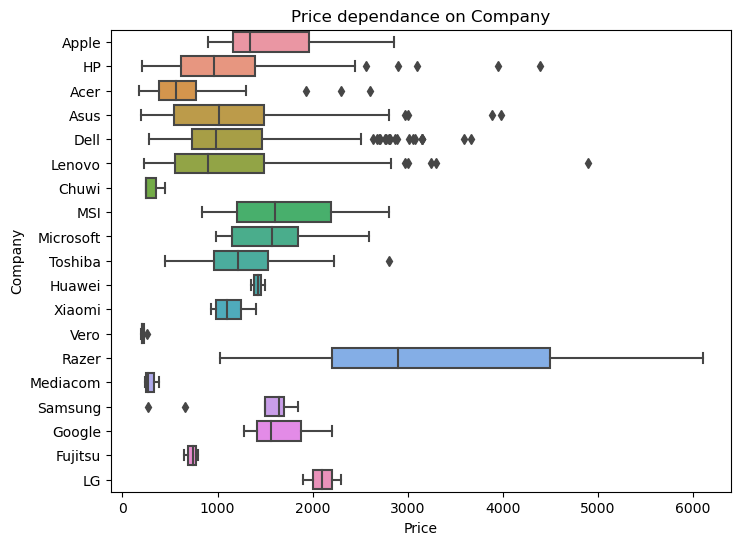

In [73]:
plt.figure(figsize=(8,6))

sns.boxplot(x=df.Price_euros, y=df.Company, whis=1.5)

plt.title('Price dependance on Company')
plt.xlabel('Price')
plt.ylabel('Company')
plt.show;

## 5. Матрица корреляции

In [77]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
# corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,laptop_ID,Inches,Weight,Price_euros,Memory_Amount,SSD
laptop_ID,1.0,-0.1,-0.0,0.1,-0.0,-0.1
Inches,-0.1,1.0,0.8,0.1,0.5,-0.1
Weight,-0.0,0.8,1.0,0.2,0.5,-0.0
Price_euros,0.1,0.1,0.2,1.0,0.2,0.5
Memory_Amount,-0.0,0.5,0.5,0.2,1.0,-0.2
SSD,-0.1,-0.1,-0.0,0.5,-0.2,1.0


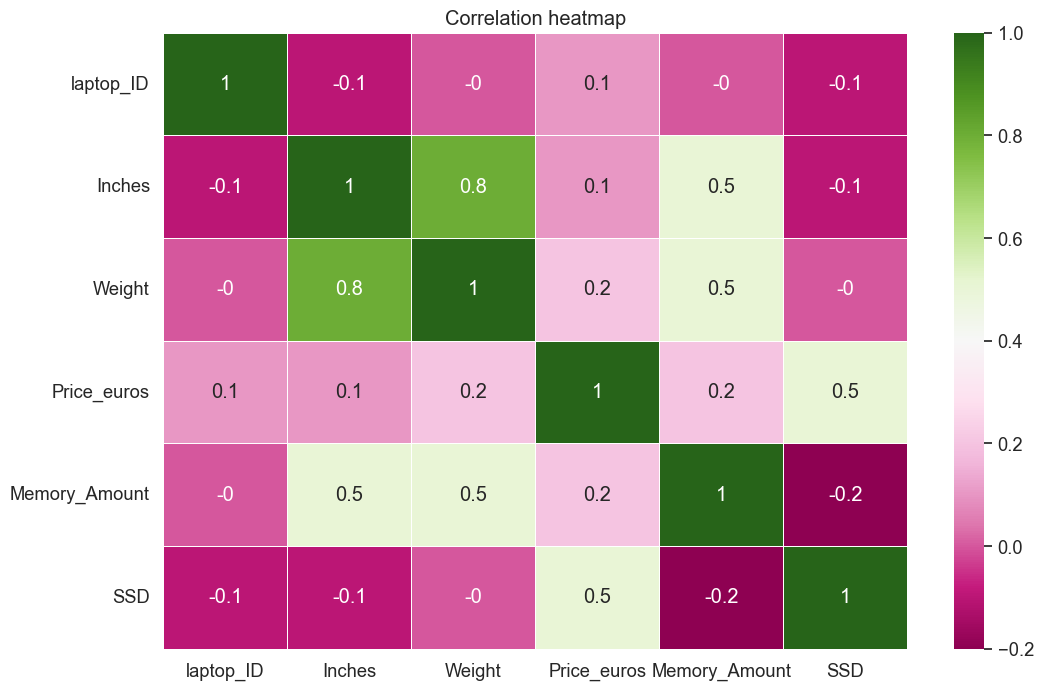

In [78]:
plt.figure(figsize=(12,8))

sns.set(font_scale=1.2)

sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='PiYG')
plt.title('Correlation heatmap');